**Id - a unique identifier for each row.
Target - the target is an ordinal variable indicating groups of income levels.
1 = extreme poverty
2 = moderate poverty
3 = vulnerable households
4 = non vulnerable households
idhogar - this is a unique identifier for each household. This can be used to create household-wide features, etc. All rows in a given household will have a matching value for this identifier.
parentesco1 - indicates if this person is the head of the household.   **

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sea  
import matplotlib.pyplot as plt 


###  Loading Train and Test Data

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
print ("Train Dataset: ", train.shape)
print ("Test Dataset:  ", test.shape)

Train Dataset:  (9557, 143)
Test Dataset:   (18619, 142)


In [3]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [4]:
train.head(5)


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
train

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [6]:
train["Target"].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

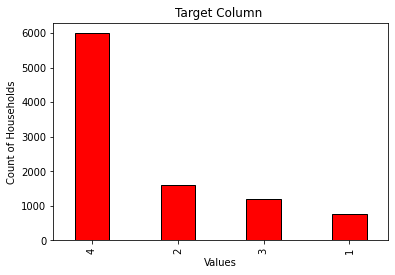

In [7]:
 # - 1 : Extreme Poverty
  #- 2 : Moderate Poverty
  # 3 : Vulnerable Households
  #- 4 : Non-vulnerable Households
train['Target'].value_counts().plot.bar(width = 0.4, color = 'r', edgecolor = 'k', linewidth = 1)
plt.xlabel("Values")
plt.ylabel("Count of Households")
plt.title("Target Column ")
plt.show()

In [8]:
T_info = pd.DataFrame(columns=['Name of Col', 'Num of Null', 'Dtype', 'N_Unique'])

for i in range(0, len(train.columns)):
    T_info.loc[i] = [train.columns[i],
                       train[train.columns[i]].isnull().sum(),
                       train[train.columns[i]].dtypes,
                       train[train.columns[i]].nunique()] 
T_info

,Name of Col,Num of Null,Dtype,N_Unique
0,Id,0,object,9557
1,v2a1,6860,float64,157
2,hacdor,0,int64,2
3,rooms,0,int64,11
4,hacapo,0,int64,2
...,...,...,...,...
138,SQBovercrowding,0,float64,38
139,SQBdependency,0,float64,31
140,SQBmeaned,5,float64,155
141,agesq,0,int64,97


In [9]:
#with same poverty level
poverty = train.groupby('idhogar')['Target'].apply(lambda X: X.nunique() == 1) 
#households with un-equal poverty level
poverty = poverty[poverty != True] 
print("There are {} households where family members of the house don't have same poverty level." .format(len(poverty)))

There are 85 households where family members of the house don't have same poverty level.


In [10]:
#households with head
headof_Family = train.groupby('idhogar')['parentesco1'].sum()

In [11]:
#households without head
family_no_head = train.loc[train['idhogar'].isin(headof_Family[headof_Family == 0].index), :]
family_no_head["idhogar"].nunique()

15

In [12]:
#Counting the number of households in the family_no_head data frame that do not have a head and have more than one unique value in the Target 
family_no_head_equal = family_no_head.groupby('idhogar')['Target'].apply(lambda X: X.nunique() == 1) 
print("{} households without head have different Target Value." .format(sum(family_no_head_equal == False)))

0 households without head have different Target Value.


In [13]:
#setting the value of the Target column for all members of a household ( by the idhogar column) to be the same as the value of the Target column for the head of the household
for household in poverty.index:
    head_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)] ['Target'])
    train.loc[train['idhogar'] == household, 'Target'] = head_target

#non_numeric

In [14]:
#First, let's deal with non-numeric columns
train.select_dtypes(['object']).head(15)

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
5,ID_ec05b1a7b,2b58d945f,yes,11,no
6,ID_e9e0c1100,2b58d945f,yes,11,no
7,ID_3e04e571e,d6dae86b7,yes,9,no
8,ID_1284f8aad,d6dae86b7,yes,9,no
9,ID_51f52fdd2,d6dae86b7,yes,9,no


#Object To Numeric

#dependency


In [15]:
train['dependency'].value_counts(ascending=False)

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
1.75           11
1.2            11
.83333331      11
.22222222      11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

In [16]:
train['dependency'] = train['dependency'].replace(('yes', 'no'), (1, 0))
test['dependency'] = test['dependency'].replace(('yes', 'no'), (1, 0))
train['dependency']=train['dependency'].astype(float)
test['dependency']=test['dependency'].astype(float)

#edjefe | edjefa

In [17]:
#edjefe, no of years of education (male) 
train['edjefe'].value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [18]:
#edjefa, no of years of education (female) 
train['edjefa'].value_counts()


no     6230
6       947
11      399
9       237
8       217
15      188
7       179
5       176
3       152
4       136
14      120
16      113
10       96
2        84
17       76
12       72
yes      69
13       52
21        5
19        4
18        3
20        2
Name: edjefa, dtype: int64

In [19]:
#edjefa
train['edjefa'] = train['edjefa'].replace(('yes', 'no'), (1, 0))
test['edjefa'] = test['edjefa'].replace(('yes', 'no'), (1, 0))
#edjefe 
train['edjefe'] = train['edjefe'].replace(('yes', 'no'), (1, 0))
test['edjefe'] = test['edjefe'].replace(('yes', 'no'), (1, 0))

In [20]:
#converting these object type columns to floats
train['edjefa']=train['edjefa'].astype(float)
test['edjefa']=test['edjefa'].astype(float)
train['edjefe']=train['edjefe'].astype(float)
test['edjefe']=test['edjefe'].astype(float)

In [21]:
print (train.select_dtypes(['object']).describe())
print (test.select_dtypes(['object']).describe())

                  Id    idhogar
count           9557       9557
unique          9557       2988
top     ID_279628684  fd8a6d014
freq               1         13
                  Id    idhogar
count          18619      18618
unique         18619       5741
top     ID_2f6873615  8e9159699
freq               1         13


#Missing values

In [22]:
print (" Training Columns with miss_value values:")
miss_value = train.isnull().sum().to_frame()
miss_value = miss_value.sort_values(0, ascending = False)
miss_value.head()

 Training Columns with miss_value values:


,0
rez_esc,7928
v18q1,7342
v2a1,6860
SQBmeaned,5
meaneduc,5


In [23]:
print (" Test Columns with miss_value values:")
miss_value = test.isnull().sum().to_frame()
miss_value = miss_value.sort_values(0, ascending = False)
miss_value.head()

 Test Columns with miss_value values:


,0
rez_esc,15548
v18q1,13563
v2a1,13128
meaneduc,17
SQBmeaned,17


In [24]:
#v18q - has or not
#v18q1 - no of tablets
train.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    7342
1       0
Name: v18q1, dtype: int64

In [25]:
#0 of Null 
train['v18q1'] = train['v18q1'].fillna(0)
test['v18q1'] = test['v18q1'].fillna(0)

In [26]:
#rez_esc - Years behind in school | instlevel1 no level of edu | instlevel2 incomplete primary
print (train.loc[train['rez_esc'].isnull()]['age'].value_counts().head(5))
print (train.loc[train['rez_esc'].isnull()]['instlevel1'].value_counts())
print (train.loc[train['rez_esc'].isnull()]['instlevel2'].value_counts())

23    189
20    179
18    179
30    178
19    170
Name: age, dtype: int64
0    6745
1    1183
Name: instlevel1, dtype: int64
0    7031
1     897
Name: instlevel2, dtype: int64


In [27]:
print (train.loc[train['rez_esc'].notnull()]['age'].describe())

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64


The MIN 7 AND THE MAX 17

In [28]:
train[train['rez_esc'].isna() & ((train['age'] > 7) & (train['age'] < 17))]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,ID_f012e4242,160000.0,0,6,0,1,1,1,1.0,0,...,0,100,9,121,1,2.25,0.25,182.25,100,4


In [29]:
train['rez_esc'] = train['rez_esc'].fillna(0)
test['rez_esc'] = test['rez_esc'].fillna(0)

In [30]:
print('Maximum of Train : %d' % train['rez_esc'].max())
print('Maximum of test : %d' % test['rez_esc'].max())

Maximum of Train : 5
Maximum of test : 99


In [31]:
#5 -  outliers
train.loc[train['rez_esc'] > 5, 'rez_esc'] = 5
test.loc[test['rez_esc'] > 5, 'rez_esc'] = 5 

v2a1 (Monthly rent payment)


In [32]:
print(train['v2a1'].isnull().sum())


6860


In [33]:
#Replacing with '0' na for fully paid house 
train.loc[(train['v2a1'].isnull() & train['tipovivi1'] == 1), 'v2a1'] = 0
test.loc[(test['v2a1'].isnull() & test['tipovivi1'] == 1), 'v2a1'] = 0

In [34]:
#paid
print (train.loc[train['v2a1'].isnull()]['tipovivi1'].value_counts())


0    949
Name: tipovivi1, dtype: int64


In [35]:
#tipovivi2, "=1 own,  paying in installments"
#tipovivi3, =1 rented
#tipovivi4, =1 precarious
#tipovivi5, "=1 other(assigned,  borrowed)
print (train.loc[train['v2a1'].isnull()]['tipovivi2'].value_counts())
print (train.loc[train['v2a1'].isnull()]['tipovivi3'].value_counts())
print (train.loc[train['v2a1'].isnull()]['tipovivi4'].value_counts())
print (train.loc[train['v2a1'].isnull()]['tipovivi5'].value_counts())

0    949
Name: tipovivi2, dtype: int64
0    949
Name: tipovivi3, dtype: int64
0    786
1    163
Name: tipovivi4, dtype: int64
1    786
0    163
Name: tipovivi5, dtype: int64


In [36]:
#tipovivi4, =1 precarious ===== msh mostkr fa msh m3rof
train.loc[(train['v2a1'].isnull() & train['tipovivi4'] == 1), 'v2a1'] = 0
test.loc[(test['v2a1'].isnull() & test['tipovivi4'] == 1), 'v2a1'] = 0

In [37]:
print (train.loc[train['v2a1'].isnull()]['Target'].value_counts())


4    371
2    212
3    110
1     93
Name: Target, dtype: int64


In [38]:
#if 'assigned, borrowed' == m3lhosh flos
train['v2a1'].fillna(train['v2a1'].mean(), inplace = True)
test['v2a1'].fillna(test['v2a1'].mean(), inplace = True)

In [39]:
print (" Training Columns with miss_value values:")
miss_value = train.isnull().sum().to_frame()
miss_value = miss_value.sort_values(0, ascending = False)
miss_value.head()

 Training Columns with miss_value values:


,0
SQBmeaned,5
meaneduc,5
Id,0
hogar_mayor,0
parentesco10,0


In [40]:
print (" Test Columns with miss_value values:")
miss_value = test.isnull().sum().to_frame()
miss_value = miss_value.sort_values(0, ascending = False)
miss_value.head()

 Test Columns with miss_value values:


,0
SQBmeaned,17
meaneduc,17
eviv2,1
hogar_adul,1
parentesco9,1


In [41]:
#for meaneduc 
for data in [train,test]:
    data['meaneduc'].fillna(value = data['edjefe'], inplace = True)
    
train['meaneduc'].isnull().sum()

0

In [42]:
#SQBmeaned


for data in [train,test]:
    data['SQBmeaned'].fillna(value = data['meaneduc']**2, inplace = True)
    
train['SQBmeaned'].isnull().sum()

0

In [43]:
print ('Columns with miss_value ')
print (train.columns.isnull())


Columns with miss_value 
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]


In [44]:
#Dropping squared features
column_drop = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

for df in [train, test]:
    df.drop(columns=column_drop, inplace=True)

print(train.shape, test.shape)

(9557, 134) (18619, 133)


In [45]:
print(train.shape, test.shape)

(9557, 134) (18619, 133)


#Outliers

In [46]:
# Calculate the IQR for each column
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

In [47]:
# Remove outliers from the DataFrame by keeping only rows that fall within the IQR range
df_filtered = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-47-8979ed623e3a>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_filtered = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]


In [48]:
print(train.shape, test.shape)


(9557, 134) (18619, 133)


In [49]:
#parentesco1 - indicates if this person is the head of the household.
h_of_family = train.loc[train['parentesco1'] == 1, :]
h_of_family.shape

(2973, 134)

In [50]:
corr_matrix = h_of_family.corr()
corr_matrix

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
v2a1,1.000000,-0.020351,0.081988,-0.020845,0.023166,0.037060,0.170973,0.194652,0.035332,-0.034226,...,0.154492,-0.039374,-0.017192,-0.071567,-0.080740,-0.064700,0.127960,-0.127960,-0.219502,0.155337
hacdor,-0.020351,1.000000,-0.181283,0.624324,-0.143713,-0.055073,-0.061309,-0.056616,0.186709,0.057368,...,-0.029605,0.010581,0.026791,-0.010283,0.025574,0.001103,0.025404,-0.025404,-0.090660,-0.136275
rooms,0.081988,-0.181283,1.000000,-0.172382,0.136410,0.158394,0.263738,0.271945,-0.039824,0.232702,...,0.210526,-0.069091,-0.132380,-0.028103,-0.097762,-0.055276,0.126715,-0.126715,0.189562,0.201019
hacapo,-0.020845,0.624324,-0.172382,1.000000,-0.154749,-0.062110,-0.051432,-0.045953,0.174432,0.088729,...,-0.032999,0.018682,0.007766,0.000237,0.007112,0.025496,0.015219,-0.015219,-0.053421,-0.096313
v14a,0.023166,-0.143713,0.136410,-0.154749,1.000000,0.192954,0.029549,0.027883,-0.036434,0.019440,...,0.018571,-0.007181,-0.015806,0.006585,-0.021979,0.005262,-0.018117,0.018117,0.031887,0.068230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lugar6,-0.064700,0.001103,-0.055276,0.025496,0.005262,-0.053853,-0.081023,-0.080580,0.037855,0.030872,...,-0.348073,-0.091332,-0.076929,-0.086971,-0.092448,1.000000,-0.247387,0.247387,-0.036605,-0.047958
area1,0.127960,0.025404,0.126715,0.015219,-0.018117,0.066396,0.167636,0.157366,-0.034287,-0.043043,...,0.375230,-0.102796,-0.009893,-0.184287,-0.123131,-0.247387,1.000000,-1.000000,0.046851,0.089509
area2,-0.127960,-0.025404,-0.126715,-0.015219,0.018117,-0.066396,-0.167636,-0.157366,0.034287,0.043043,...,-0.375230,0.102796,0.009893,0.184287,0.123131,0.247387,-1.000000,1.000000,-0.046851,-0.089509
age,-0.219502,-0.090660,0.189562,-0.053421,0.031887,0.038315,-0.082681,-0.076773,-0.292030,0.048152,...,0.088904,0.004921,-0.046924,-0.025493,-0.057551,-0.036605,0.046851,-0.046851,1.000000,0.026581


In [51]:
#Selecting the T_UP traingle of corr_matrix
T_UP = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

In [52]:
column_drop_to_drop = [column for column in T_UP.columns if any(abs(T_UP[column]) > 0.99)]

column_drop_to_drop


['tamhog', 'hhsize', 'female', 'hogar_total', 'area2']

In [53]:
#Dropping the column_drop_to_drop features
for df in [train, test]:
    df.drop(columns=column_drop_to_drop, inplace=True)
#Removing the male as well, as this would not be needed in model creation
for df in [train, test]:
    df.drop(columns = 'male',inplace=True)


#dropping 'Id' and 'idhogar' columns 
column_drop = ['Id','idhogar']
for df in [train, test]:
    df.drop(columns= column_drop, inplace=True)

print(train.shape, test.shape)

(9557, 126) (18619, 125)


In [54]:
print(train.shape, test.shape)

(9557, 126) (18619, 125)


In [55]:
#Defining features and target variable
X = train.drop('Target', axis=1)
y = train['Target']


In [56]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
X_train, X_test, y_train, y_test = train_test_split (X, y,test_size = 0.1)
X_train.shape

(8601, 125)

In [57]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(max_depth=-1, learning_rate=0.1, objective='multiclass',
                             random_state=None, silent=True, metric='None', 
                             n_jobs=4, n_estimators=5000, class_weight='balanced',
                             column_dropample_bytree =  0.93, min_child_samples = 95, num_leaves = 14, subsample = 0.96)

In [58]:
eval_set = [(X_train, y_train), (X_test, y_test)]
lgb.fit(X_train, y_train, eval_metric="multiclass", eval_set=eval_set, verbose=True, early_stopping_rounds=400) 
y_pred = lgb.predict(X_test) 
y_pred = y_pred.reshape(-1, 1)

[1]	training's multi_logloss: 1.34902	valid_1's multi_logloss: 1.34468
Training until validation scores don't improve for 400 rounds.
[2]	training's multi_logloss: 1.31578	valid_1's multi_logloss: 1.30436
[3]	training's multi_logloss: 1.28614	valid_1's multi_logloss: 1.2718
[4]	training's multi_logloss: 1.25983	valid_1's multi_logloss: 1.24255
[5]	training's multi_logloss: 1.23611	valid_1's multi_logloss: 1.21724
[6]	training's multi_logloss: 1.21497	valid_1's multi_logloss: 1.19351
[7]	training's multi_logloss: 1.19385	valid_1's multi_logloss: 1.17212
[8]	training's multi_logloss: 1.17558	valid_1's multi_logloss: 1.15335
[9]	training's multi_logloss: 1.15823	valid_1's multi_logloss: 1.13633
[10]	training's multi_logloss: 1.14176	valid_1's multi_logloss: 1.11889
[11]	training's multi_logloss: 1.12597	valid_1's multi_logloss: 1.103
[12]	training's multi_logloss: 1.11131	valid_1's multi_logloss: 1.08968
[13]	training's multi_logloss: 1.097	valid_1's multi_logloss: 1.07596
[14]	training's

In [59]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
print (cm1)

[[ 75   1   0   2]
 [  1 168   2   6]
 [  2   2 114   6]
 [  4   7   5 561]]


In [60]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average ='macro')
print ('f1 score for LGBoost model:',f1)

f1 score for LGBoost model: 0.9471373628676824


In [62]:
# Compute the accuracy
print(f'accuracy of train set: {lgb.score(X_train, y_train)}')
print(f'accuracy of test set: {lgb.score(X_test, y_test)}')

accuracy of train set: 1.0
accuracy of test set: 0.9602510460251046


#Predict the accuracy random forest lgb.


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
Random_F = RandomForestClassifier(n_estimators=300)
                                   

In [64]:
Random_F.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [65]:
#Predicting the y_pred_test
y_pred_test = Random_F.predict(X_test)

In [84]:
print("Accuracy score of RFC model on test dataset is : ")
print(accuracy_score(y_test, y_pred_test))

Accuracy score of RFC model on test dataset is : 
0.946652719665272


In [85]:
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[ 70   0   0   8]
 [  2 158   0  17]
 [  1   2 101  20]
 [  0   0   1 576]]
              precision    recall  f1-score   support

           1       0.96      0.90      0.93        78
           2       0.99      0.89      0.94       177
           3       0.99      0.81      0.89       124
           4       0.93      1.00      0.96       577

    accuracy                           0.95       956
   macro avg       0.97      0.90      0.93       956
weighted avg       0.95      0.95      0.95       956



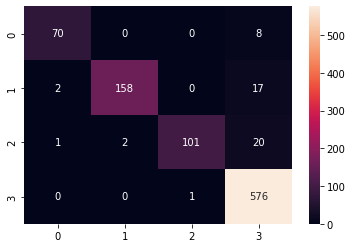

In [67]:
import seaborn as sns
cm = confusion_matrix(y_test,Random_F.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [68]:
#Defining cross validation generator and calculating cross_val_score
from sklearn.model_selection import train_test_split,KFold,cross_val_score
K_fold = KFold(n_splits=4,shuffle=True)
print(cross_val_score(Random_F, X, y, cv=K_fold, scoring='accuracy'))

[0.94476987 0.93679364 0.94767685 0.94516534]


In [69]:
feature_labels = list(X)
feature_importance = pd.DataFrame({'Feature' : feature_labels, 'Importance' : Random_F.feature_importances_})

In [70]:
feature_importance[feature_importance['Importance']>0.024]

,Feature,Importance
2,rooms,0.024416
90,hogar_nin,0.032844
93,dependency,0.042962
94,edjefe,0.031278
96,meaneduc,0.070008
107,overcrowding,0.034899
116,qmobilephone,0.029300


In [71]:
from sklearn.feature_selection import RFE
rfc_1= RandomForestClassifier()      
rfe = RFE(estimator=rfc_1, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)

In [72]:
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])


Chosen best 5 feature by rfe: Index(['dependency', 'edjefe', 'meaneduc', 'overcrowding', 'age'], dtype='object')


Text(0.5, 1.0, 'Feature importance')

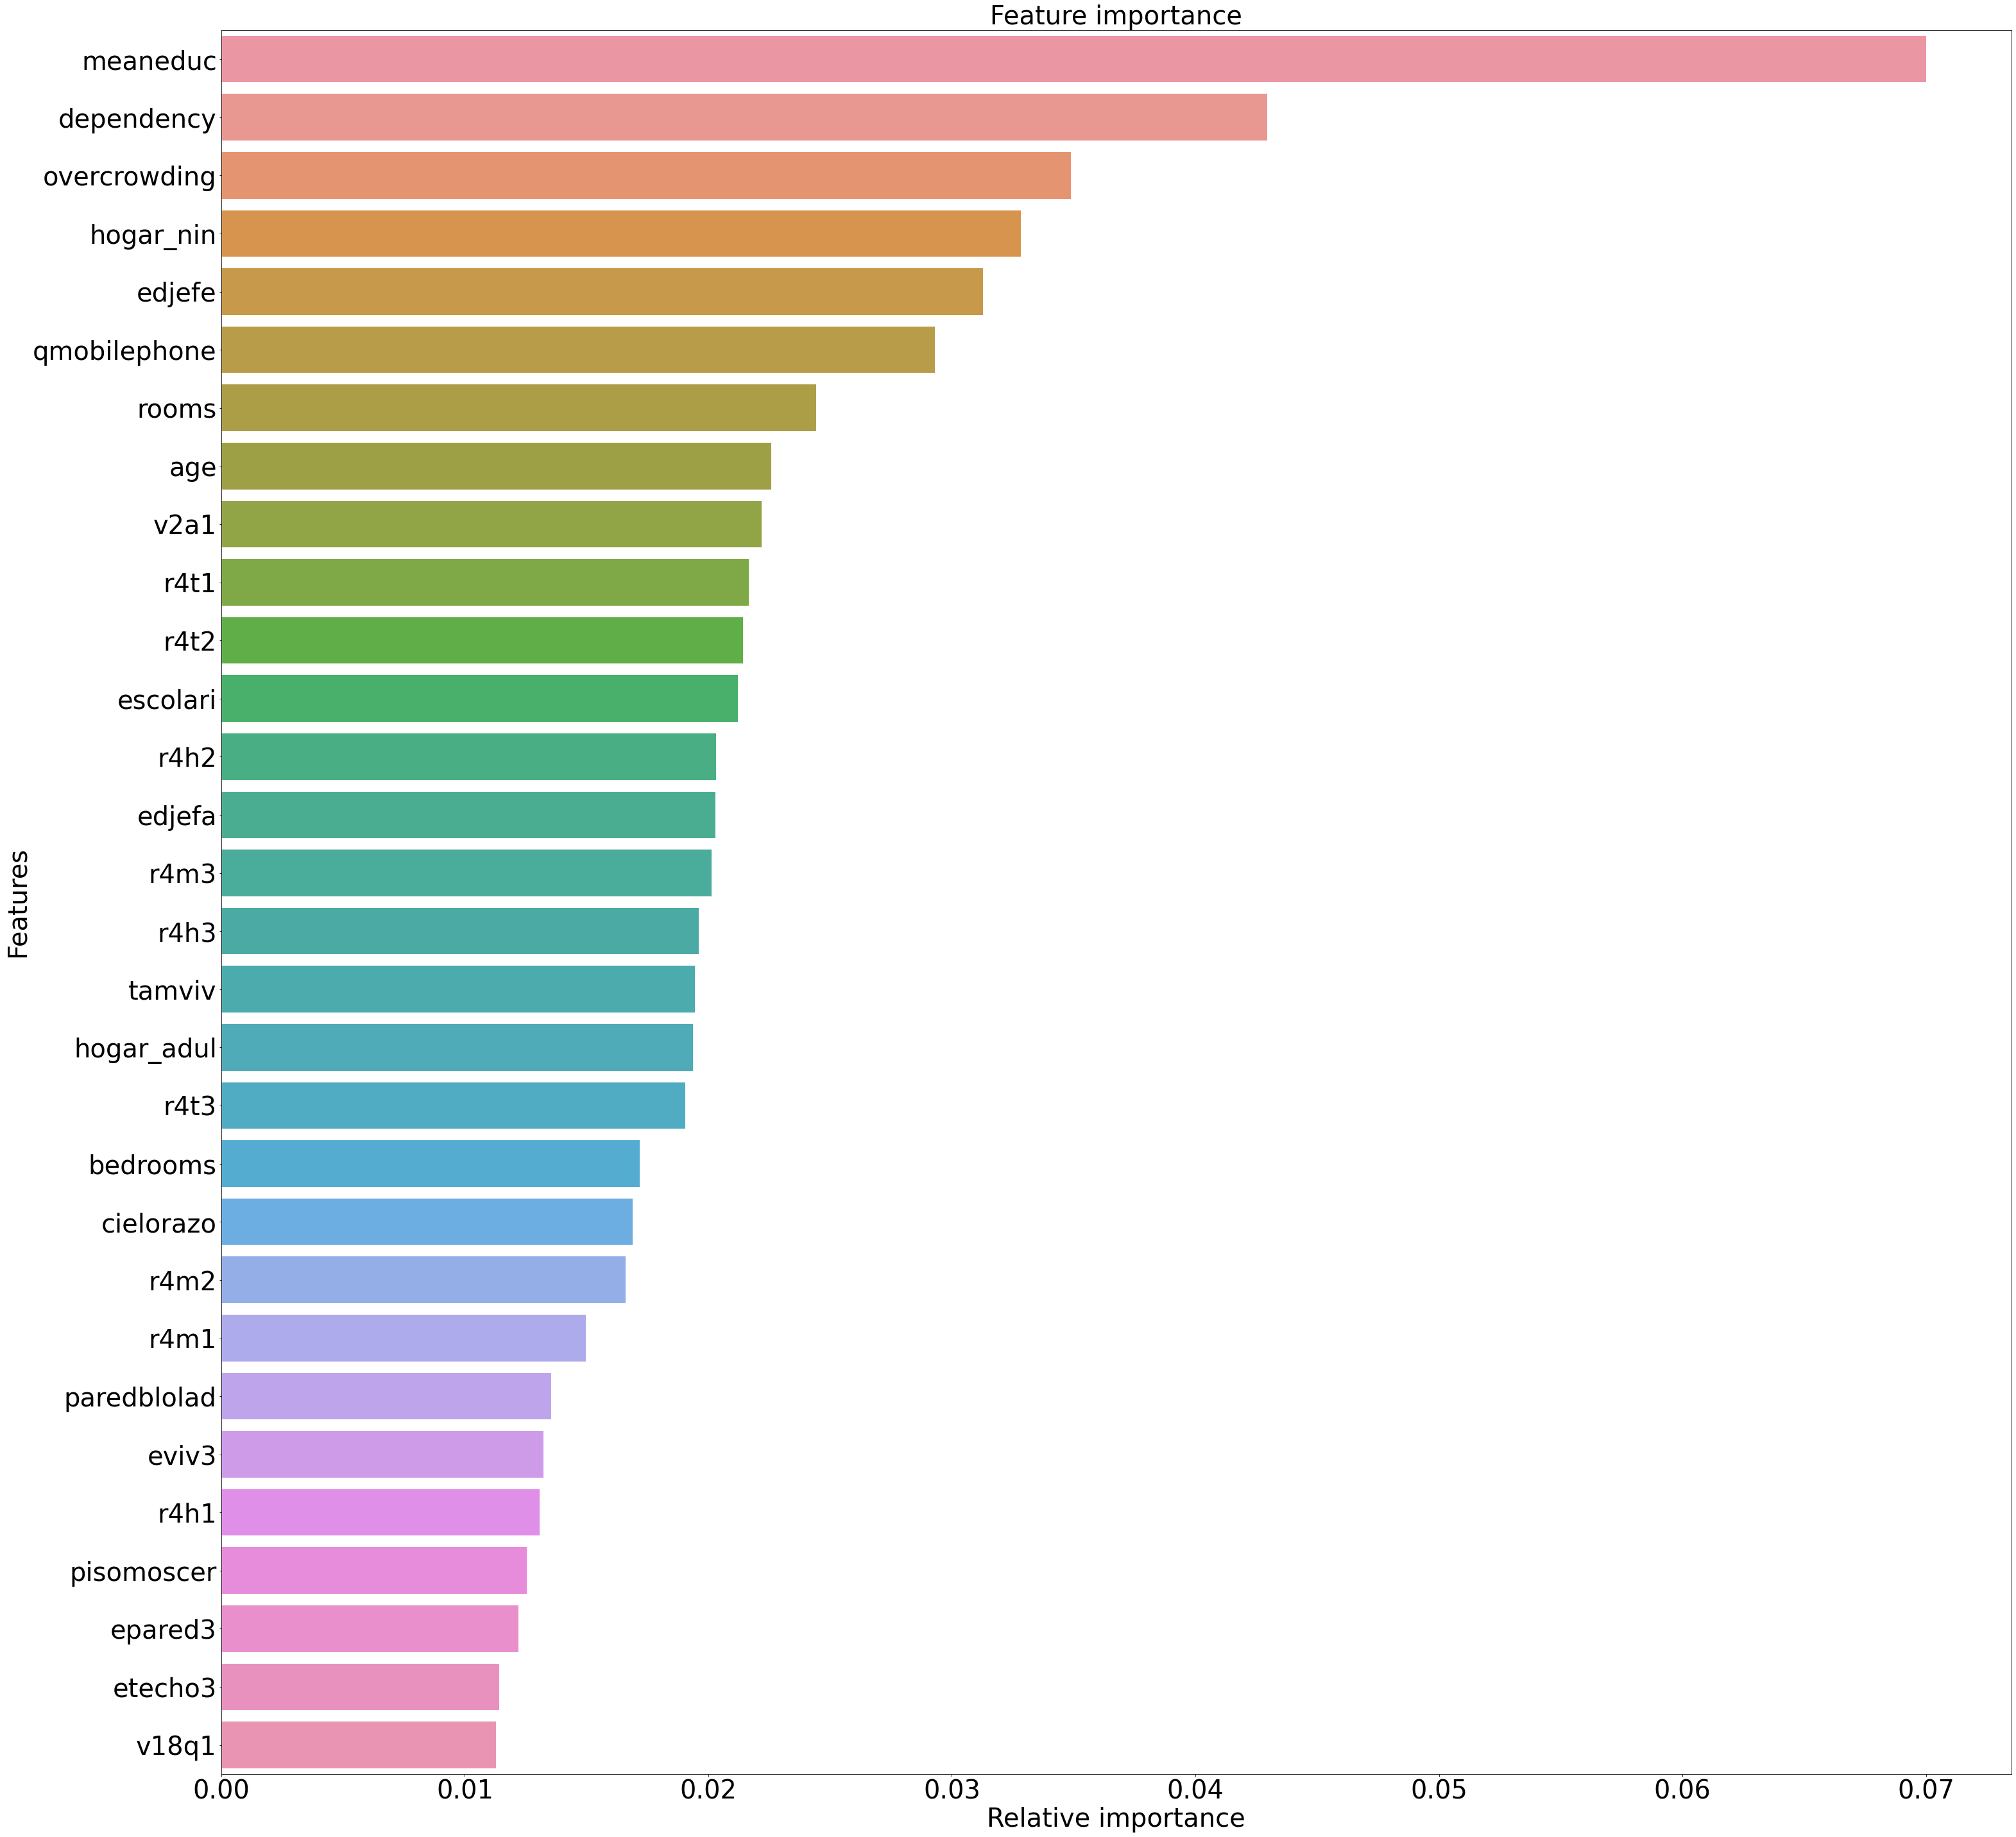

In [73]:
# Visualise with a barplot
import seaborn as sns
indices = np.argsort(Random_F.feature_importances_)[::-1]
indices = indices[:30]


plt.subplots(figsize=(50, 50))
g = sea.barplot(y=train.columns[indices], x = Random_F.feature_importances_[indices], orient='h')
g.set_xlabel("Relative importance",fontsize=40)
g.set_ylabel("Features",fontsize=40)
g.tick_params(labelsize=40)
g.set_title("Feature importance", fontsize=40)

In [74]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
predictions = LR.predict(X_test)


In [76]:
accuracy = LR.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6035564853556485


In [77]:
from sklearn.naive_bayes import GaussianNB


In [78]:
clf = GaussianNB()


In [79]:
clf.fit(X, y)


GaussianNB()

In [80]:
NBpredictions = clf.predict(X_test)


In [81]:
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5962343096234309
